In [1]:
import numpy as np

from sklearn.cluster import KMeans
from sklearn.datasets import make_circles
from sklearn.metrics.pairwise import pairwise_kernels

from tslearn.clustering import KernelKMeans

import matplotlib.pyplot as plt

In [2]:
seed = 42
n_samples = 500

X, y = make_circles(n_samples=n_samples, factor=0.2, noise=0.05, random_state=seed)

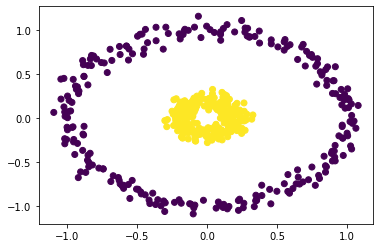

In [3]:
plt.scatter(X[:, 0], X[:, 1], c=y)

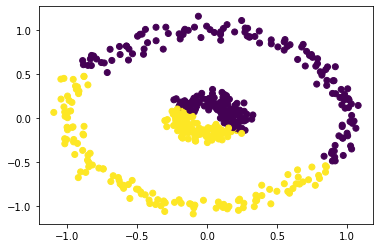

In [4]:
kmeans = KMeans(n_clusters=2).fit(X)
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_)

/home/giorgos/anaconda3/lib/python3.9/site-packages/tslearn/utils/utils.py:90: UserWarning: 2-Dimensional data passed. Assuming these are 500 1-dimensional timeseries
  warnings.warn(


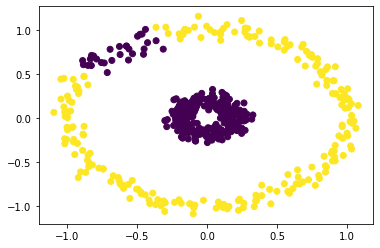

In [5]:
kernel = 'rbf'
kernel = pairwise_kernels(X, X, metric='rbf', gamma=5)

# Should find a way to init the fucking centers!
kernel_kmeans = KernelKMeans(n_clusters=2, n_init=1, kernel='precomputed').fit(kernel)
plt.scatter(X[:, 0], X[:, 1], c=kernel_kmeans.labels_)
plt.show()

In [6]:
kernel

array([[1.00000000e+00, 2.08783676e-02, 9.55280241e-01, ...,
        9.41585631e-01, 4.82698816e-01, 1.95490974e-02],
       [2.08783676e-02, 1.00000000e+00, 8.73733945e-03, ...,
        4.59432335e-02, 4.07994117e-04, 4.12619884e-02],
       [9.55280241e-01, 8.73733945e-03, 1.00000000e+00, ...,
        8.13666425e-01, 6.62973065e-01, 9.99055900e-03],
       ...,
       [9.41585631e-01, 4.59432335e-02, 8.13666425e-01, ...,
        1.00000000e+00, 3.01389245e-01, 4.43692788e-02],
       [4.82698816e-01, 4.07994117e-04, 6.62973065e-01, ...,
        3.01389245e-01, 1.00000000e+00, 6.20767783e-04],
       [1.95490974e-02, 4.12619884e-02, 9.99055900e-03, ...,
        4.43692788e-02, 6.20767783e-04, 1.00000000e+00]])

### We want a function that given the kernel and number of clusters to return me the initial partition using the kernel k-means++ algorithm

In [ ]:
def kernel_kmeans_pp(X, K, kernel, n_init=10):
    return